In [1]:
import numpy as np
import fresnel
import os
import json
import pathlib
import numpy as np
import pandas as pd
from multiprocessing import Process
import tensorflow as tf
from matplotlib import pyplot as plt
import scipy.signal as signal
import scipy
# for repeat in range(10):
#     os.mkdir(f'./{repeat}')

In [2]:
wavelength = np.linspace(0.4,0.9,51)

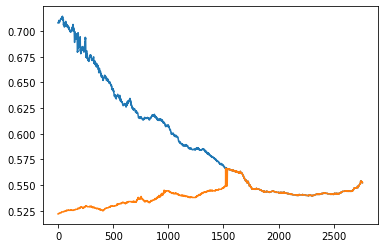

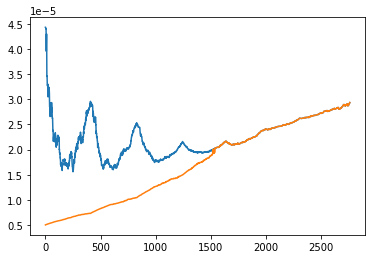

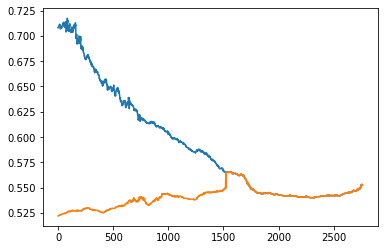

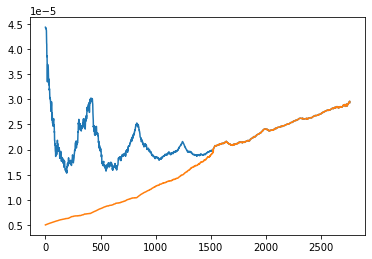

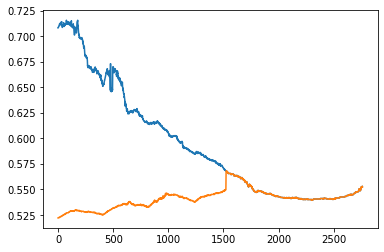

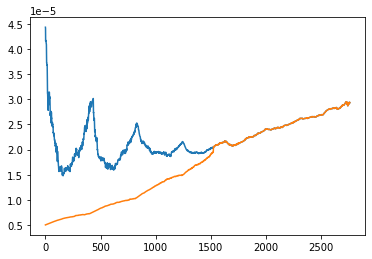

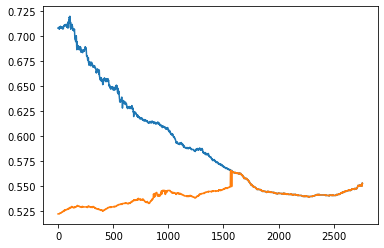

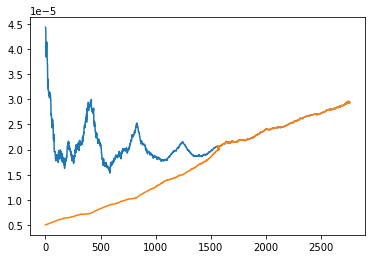

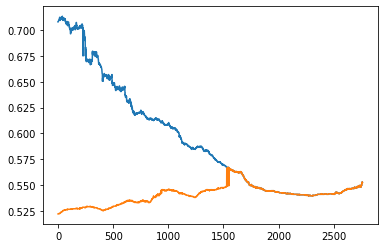

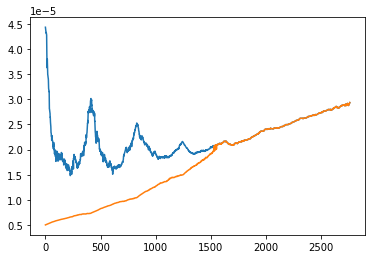

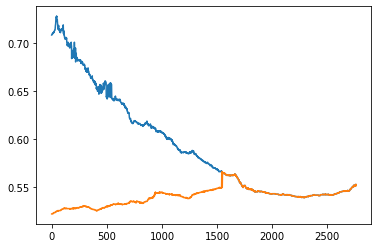

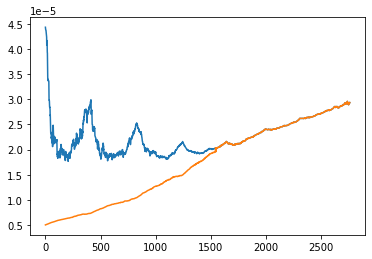

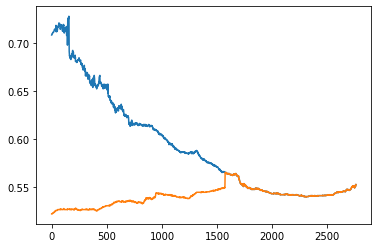

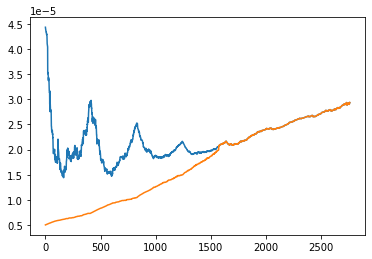

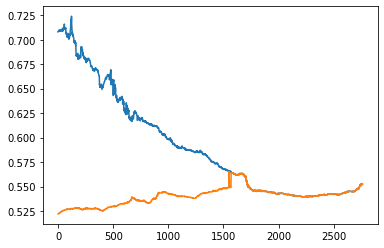

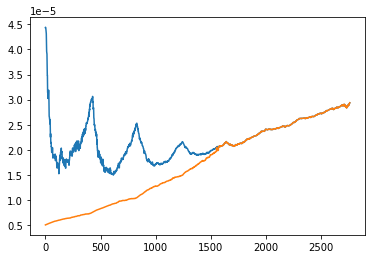

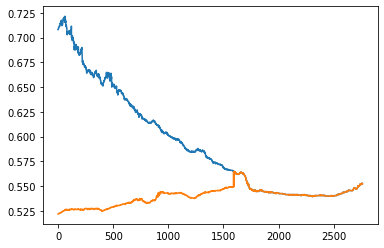

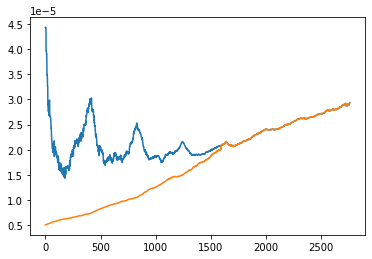

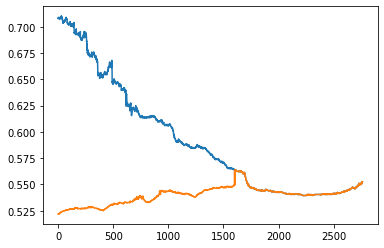

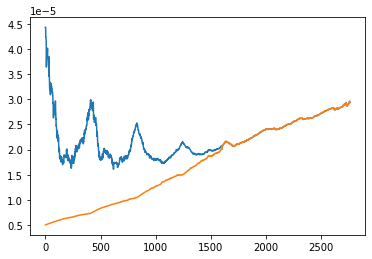

In [3]:
max_peak_position_total = []
smaller_peak_position_total = []
max_peak_cross_total = []
smaller_peak_cross_total = []
for repeat in range(10):
    data = np.loadtxt(f'./data/C_cross_{repeat}.csv',delimiter=',')
    
    max_peak_position = []
    smaller_peak_position = []
    promience = []
    # process the data simply using scipy signal to find peak prominence
    for i in range(len(data.T)):
        f = scipy.interpolate.CubicSpline(wavelength,data[:,i]) 
        data_test = f(np.linspace(0.4,0.9,1001))
        peak_index,_ = signal.find_peaks(data_test)
        if len(peak_index)>0:
            smaller_peak_position.append(min(peak_index))
        else:
            smaller_peak_position.append(None)
        promience_temp,_,__ = scipy.signal.peak_prominences(data_test, [min(peak_index),np.argmax(data_test)], wlen=None)
        promience.append(promience_temp)
        max_peak_position.append(np.argmax(data_test))

        # get rid of the probelm by regarding some small peaks around 400 nm as a seperate secondary peak
        # the larger peak is below 550 nm, two peaks already merged and we don't care possible noise peaks
        if np.linspace(0.4,0.9,1001)[max_peak_position[-1]]<550/1000:
            smaller_peak_position[-1] = max_peak_position[-1]
            
    # when there are two peaks, one of the peak can be the shoulder peak but not recognized by scipy
    # here we set a threshold of 0.1 to judge if it is a shoulder peak according to its gradient
    for equal_index in np.where((np.array(max_peak_position)== np.array(smaller_peak_position))==True)[0]:
        i = equal_index
        f = scipy.interpolate.CubicSpline(wavelength,data[:,i]) 
        data_test = f(np.linspace(0.4,0.9,1001))
        grd = np.diff(data_test)
        position = signal.find_peaks(-grd)[0]
        if len(position[(grd[position]>0) * (grd[position]<0.1)])>0:
            temp = min(position[(grd[position]>0) * (grd[position]<0.1)])
            # this shoulder peak corrsepond to the shoulder peak, so should below 600 nm
            if np.linspace(0.4,0.9,1001)[temp]<0.600:
                smaller_peak_position[i] = temp
    
    
    max_peak_wv = np.linspace(0.4,0.9,1001)[max_peak_position[::-1]]
    smaller_peak_wv = np.linspace(0.4,0.9,1001)[smaller_peak_position[::-1]]
    
    max_peak_cross = []
    smaller_peak_cross = []
    for i in range(len(data.T)):
        f = scipy.interpolate.CubicSpline(wavelength,data[:,i]) 
        data_test = f(np.linspace(0.4,0.9,1001))
        max_peak_cross_tmp = f(max_peak_wv[::-1][i])
        smaller_peak_cross_tmp = f(smaller_peak_wv[::-1][i])
        max_peak_cross.append(max_peak_cross_tmp)
        smaller_peak_cross.append(smaller_peak_cross_tmp)
    
    max_peak_cross = np.array(max_peak_cross)[::-1]
    smaller_peak_cross = np.array(smaller_peak_cross)[::-1]
    
    # Plot the peak and cross section change
    plt.plot(max_peak_wv)
    plt.plot(smaller_peak_wv)
    plt.show()
    
    plt.plot(max_peak_cross)
    plt.plot(smaller_peak_cross)
    plt.show()
    
    max_peak_position_total.append(max_peak_wv)
    smaller_peak_position_total.append(smaller_peak_wv)
    max_peak_cross_total.append(max_peak_cross)
    smaller_peak_cross_total.append(smaller_peak_cross)
    
    np.savetxt(f'./{repeat}/max_peak_wv.csv',max_peak_wv,delimiter=',')
    np.savetxt(f'./{repeat}/smaller_peak_wv.csv',smaller_peak_wv,delimiter=',')
    
    np.savetxt(f'./{repeat}/max_peak_cross.csv',max_peak_cross,delimiter=',')
    np.savetxt(f'./{repeat}/smaller_peak_cross.csv',smaller_peak_cross,delimiter=',')

Current repeat number is 0
0


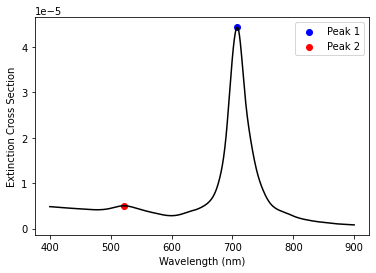

1


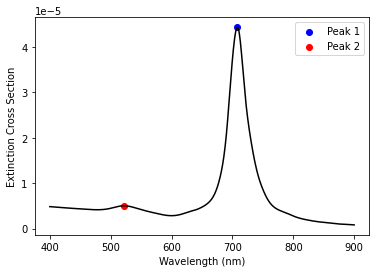

2


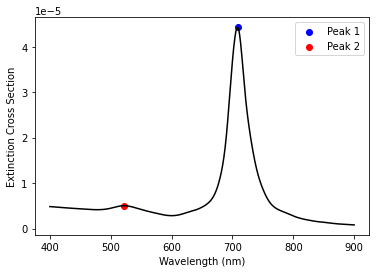

3


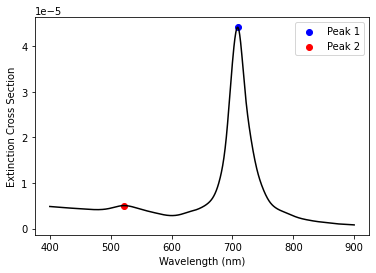

4


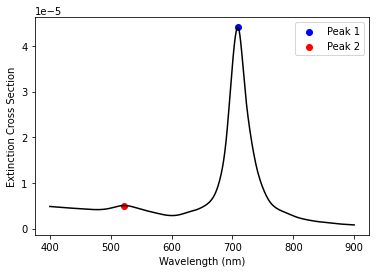

5


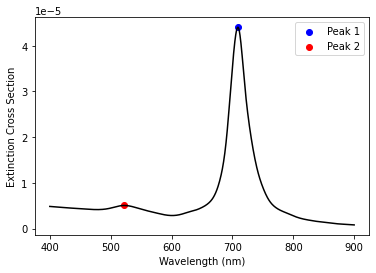

6


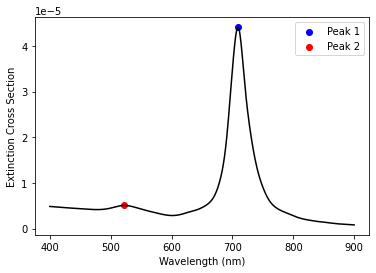

7


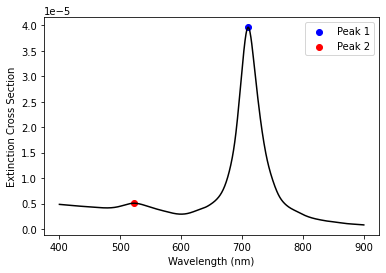

8


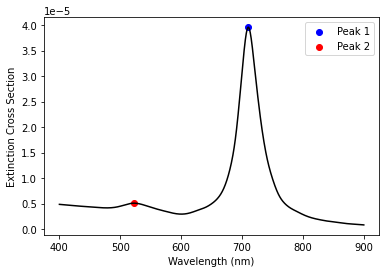

9


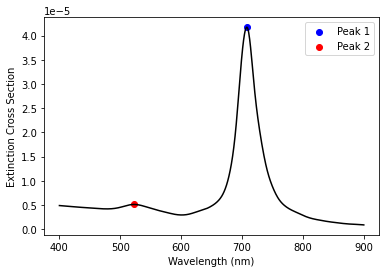

10


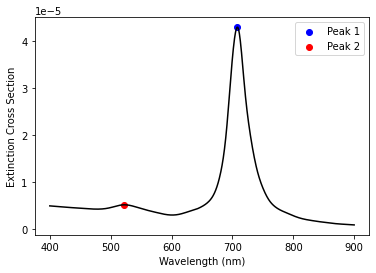

11


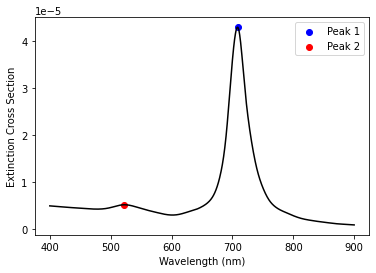

12


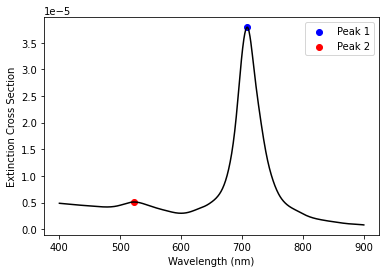

13


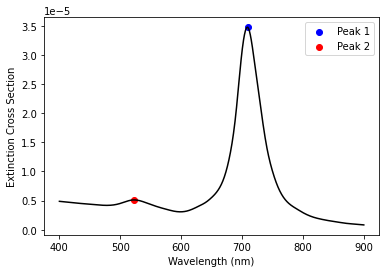

14


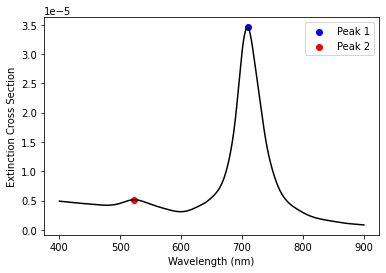

15


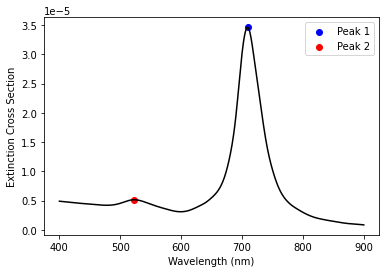

16


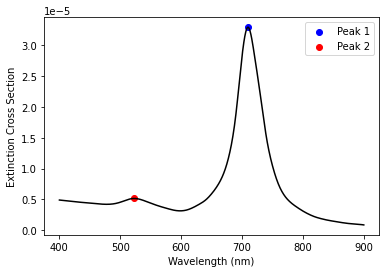

17


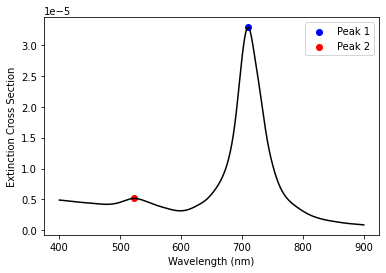

18


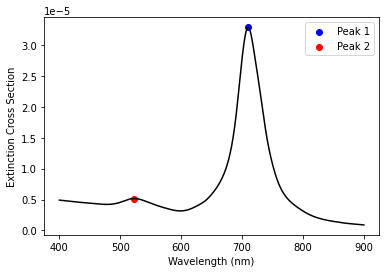

19


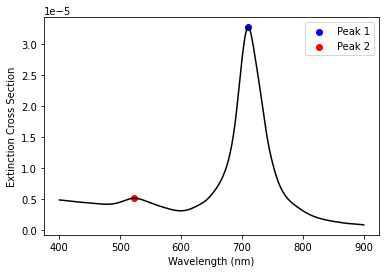

20


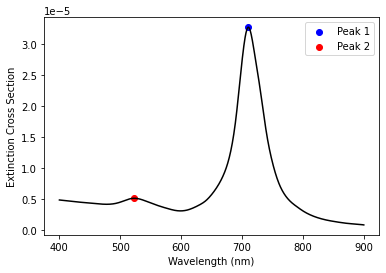

21


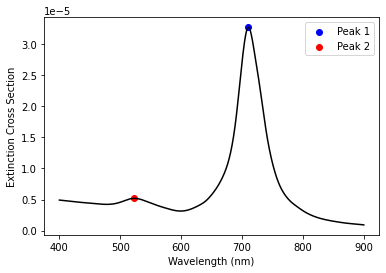

22


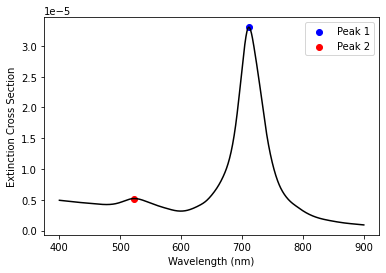

23


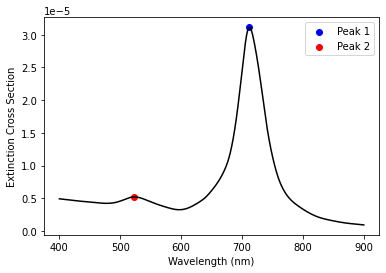

24


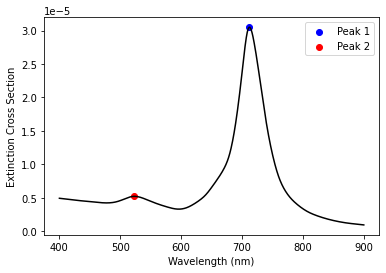

25


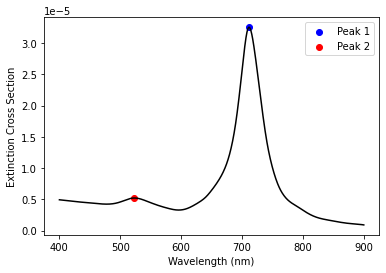

26


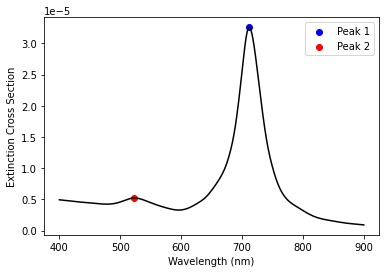

27


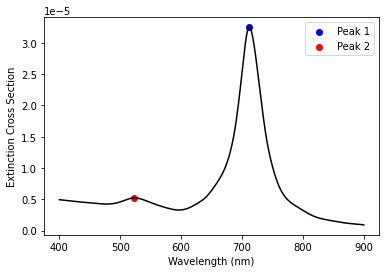

28


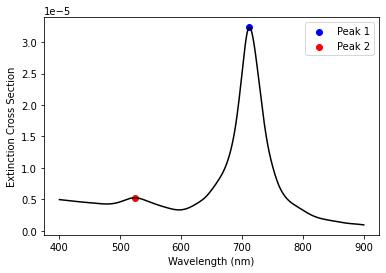

29


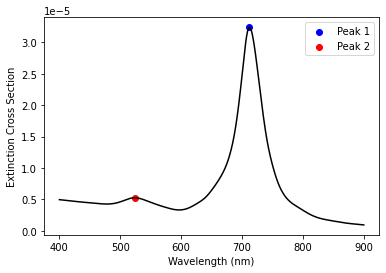

30


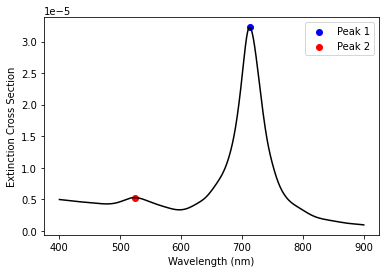

31


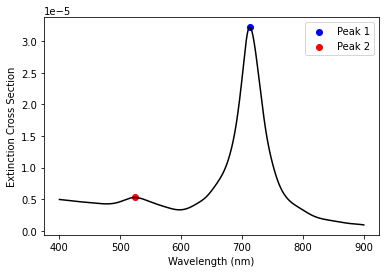

32


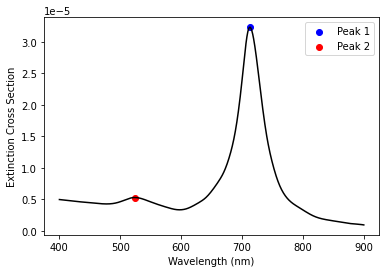

33


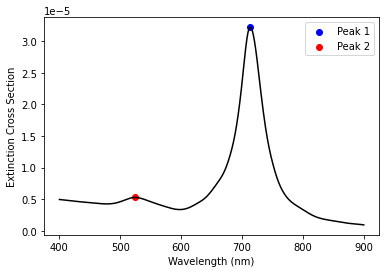

34


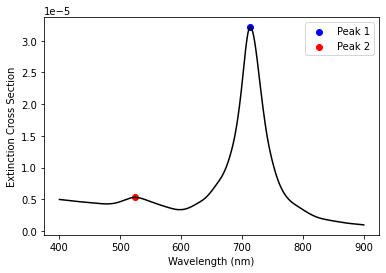

35


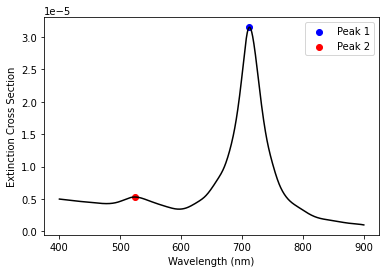

36


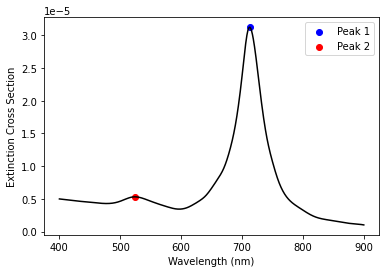

37


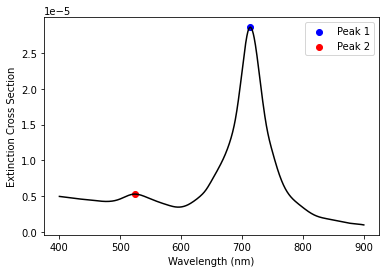

38


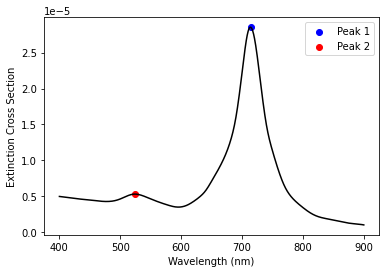

39


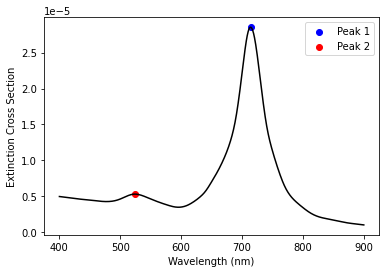

40


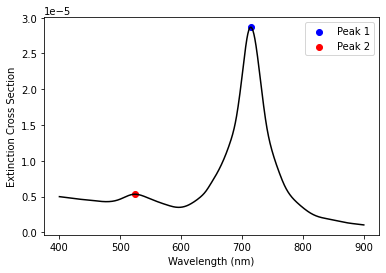

41


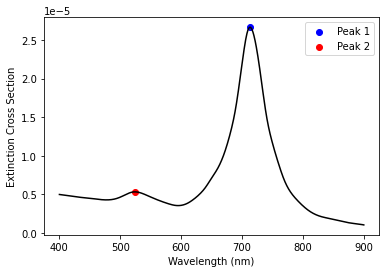

42


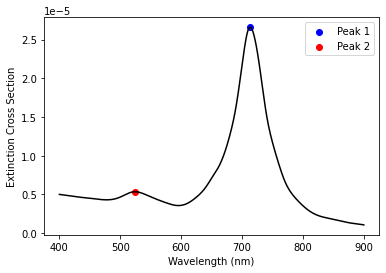

43


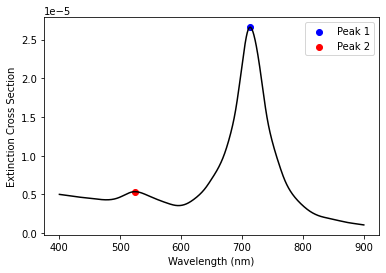

44


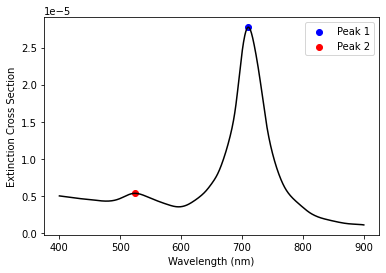

45


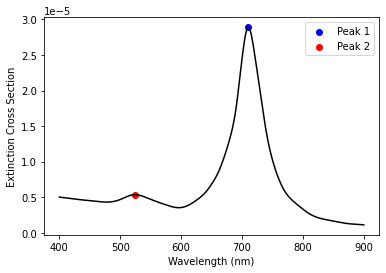

46


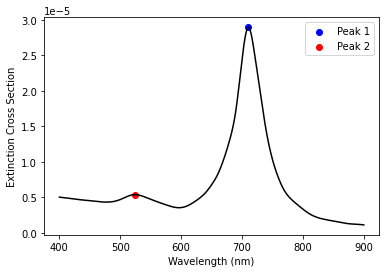

47


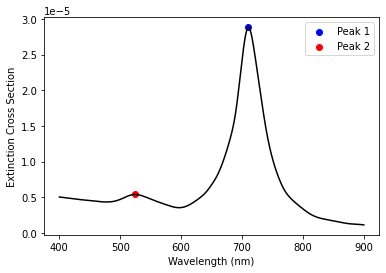

48


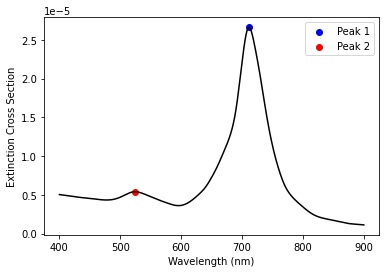

49


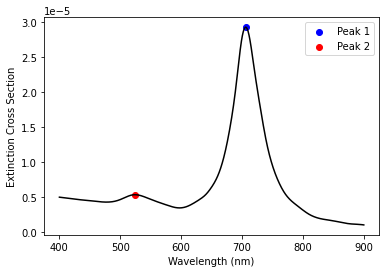

50


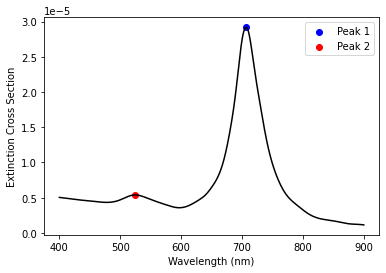

51


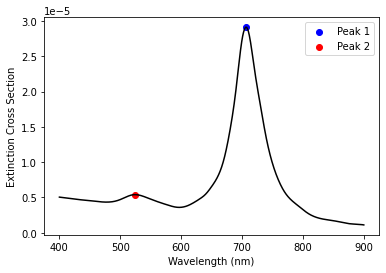

52


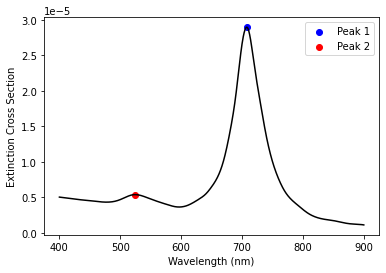

53


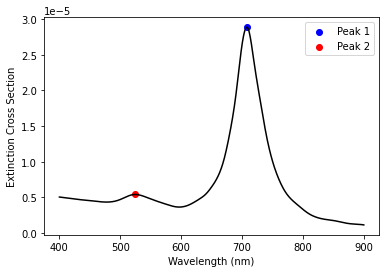

54


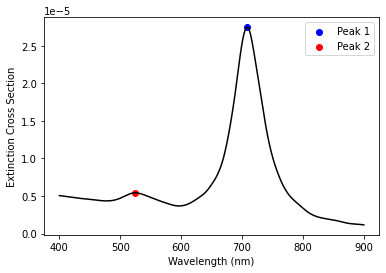

55


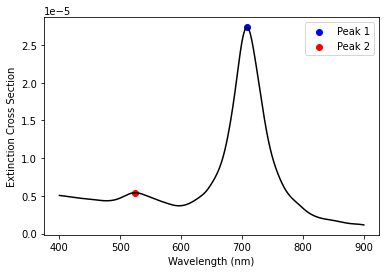

56


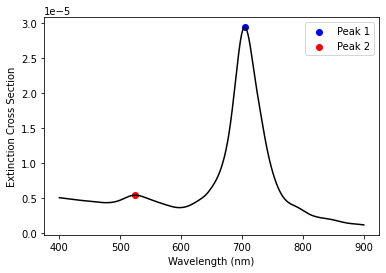

57


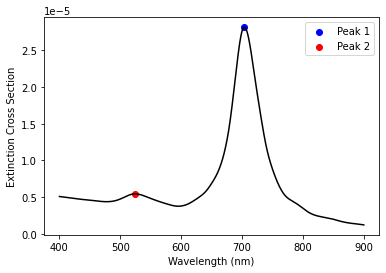

58


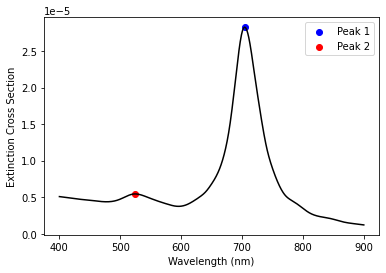

59


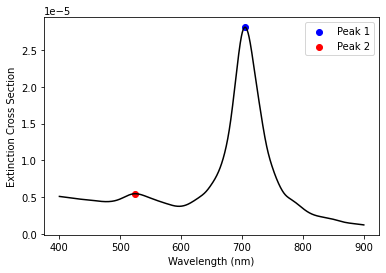

60


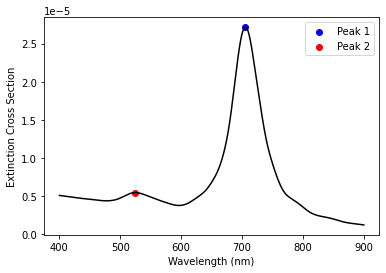

61


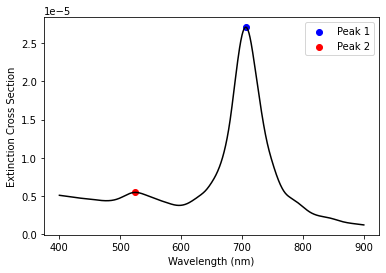

62


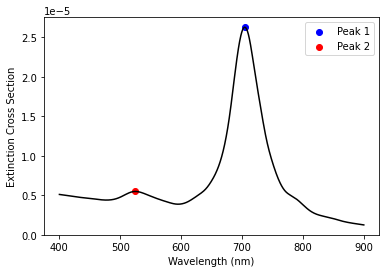

63


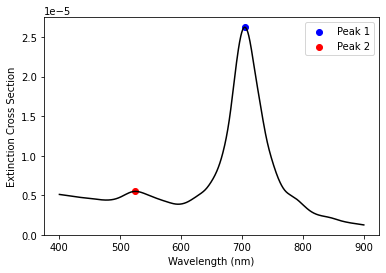

64


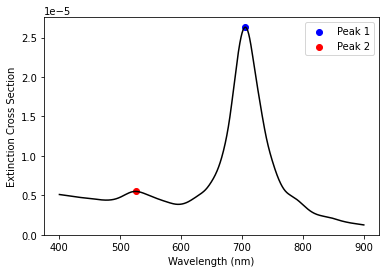

65


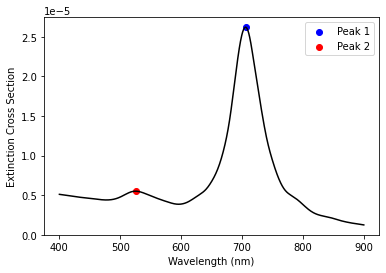

66


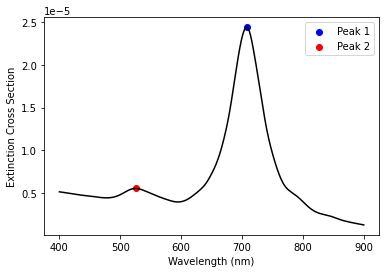

67


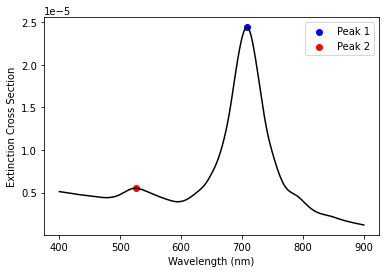

68


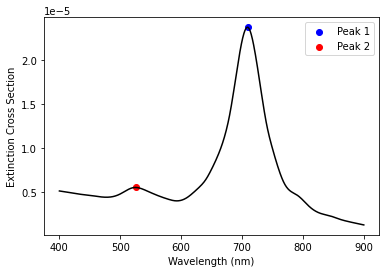

69


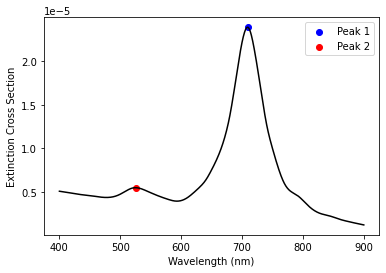

70


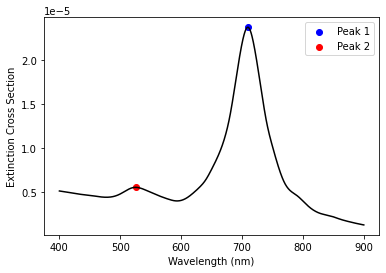

71


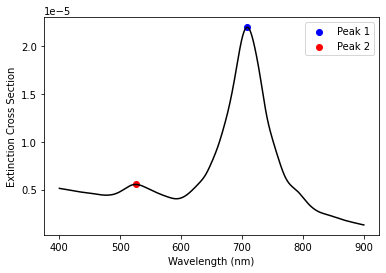

72


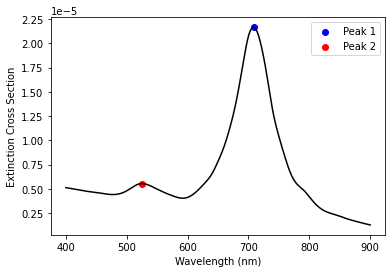

73


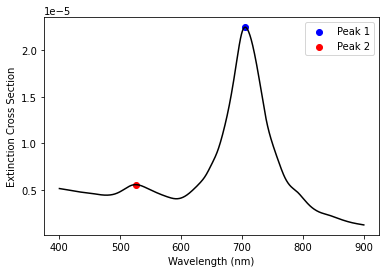

74


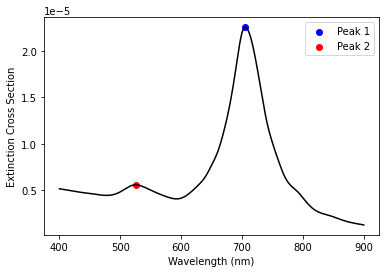

75


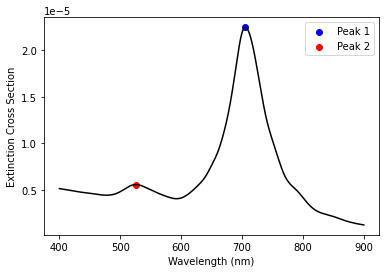

76


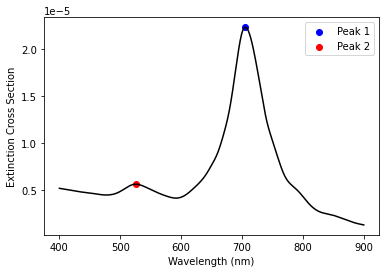

77


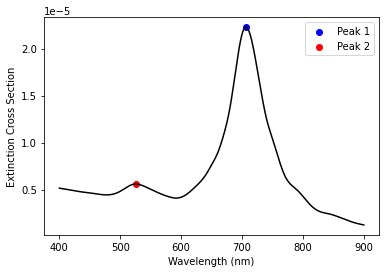

78


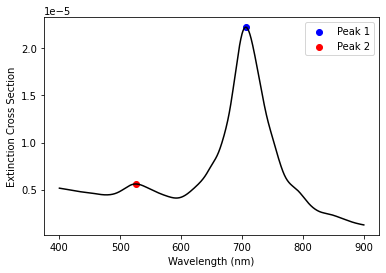

79


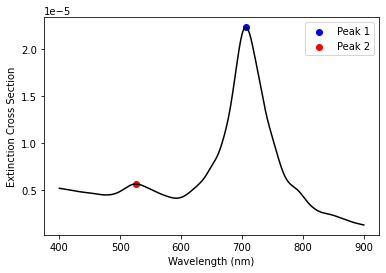

80


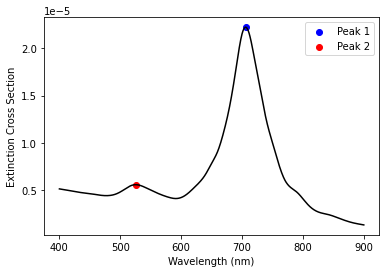

81


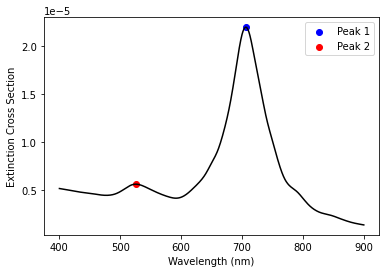

82


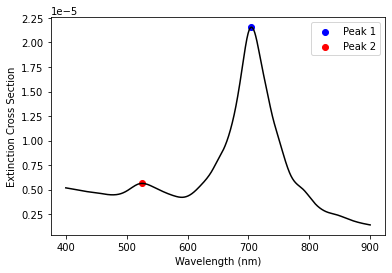

83


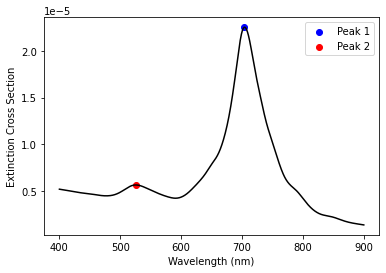

84


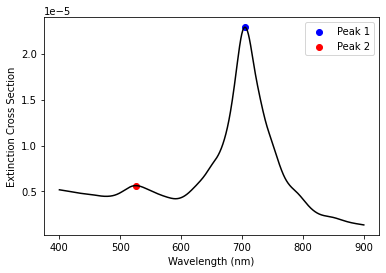

85


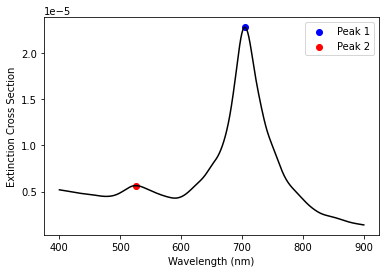

86


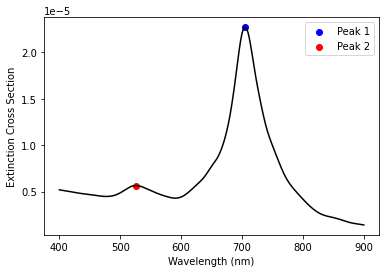

87


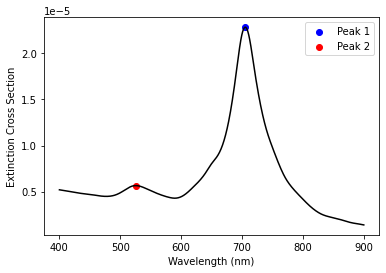

88


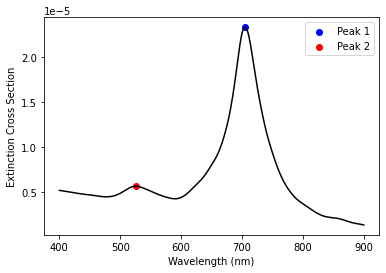

89


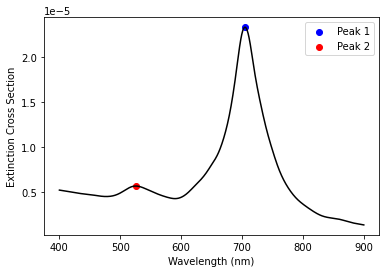

90


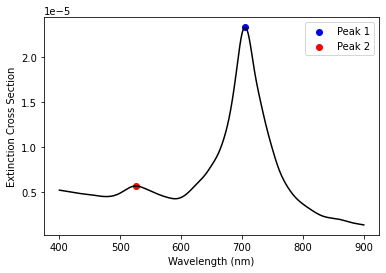

91


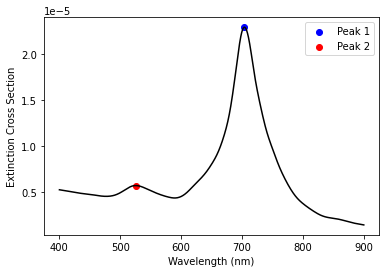

92


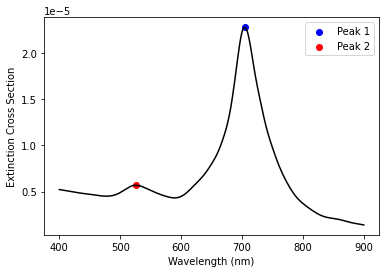

93


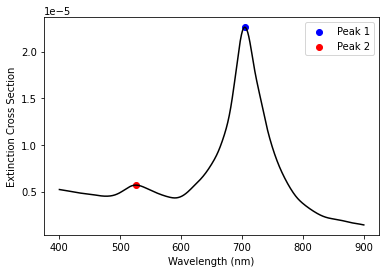

94


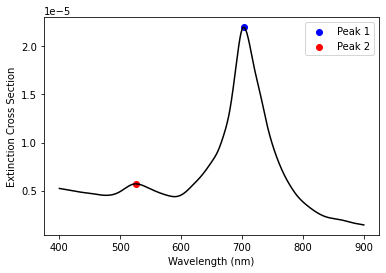

95


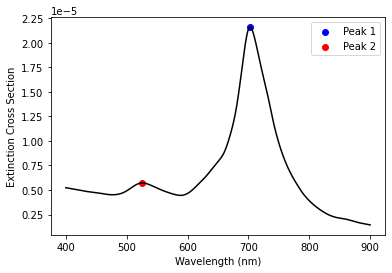

96


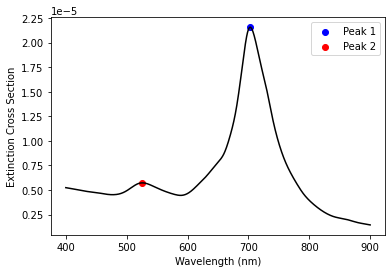

97


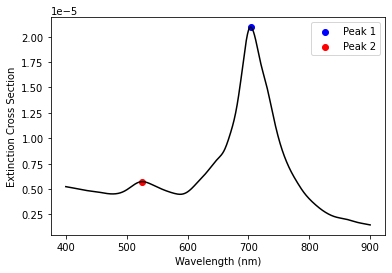

98


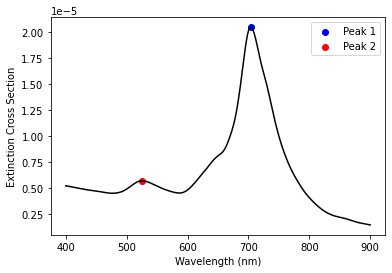

99


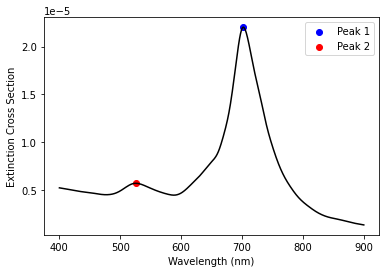

100


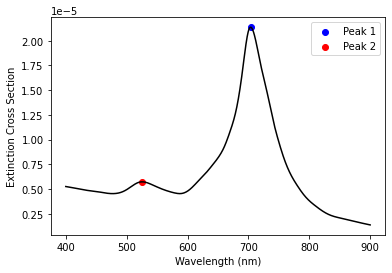

101


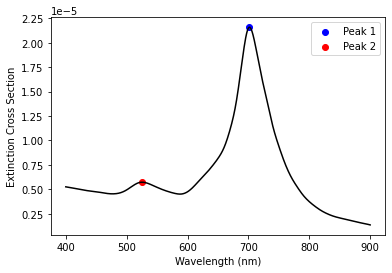

102


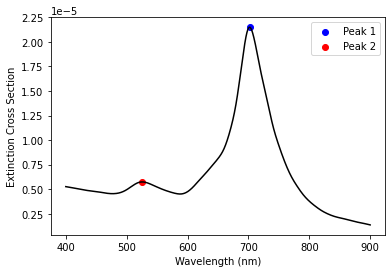

103


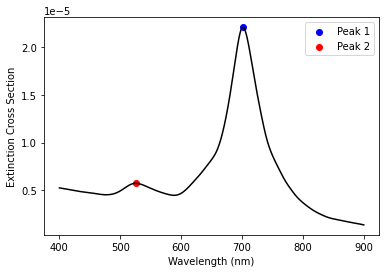

104


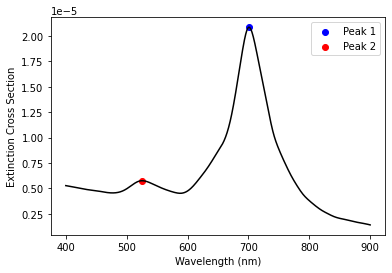

105


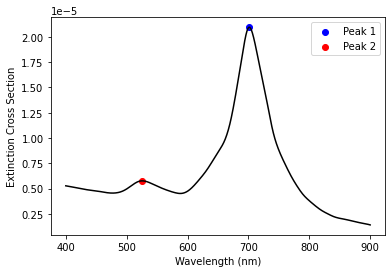

106


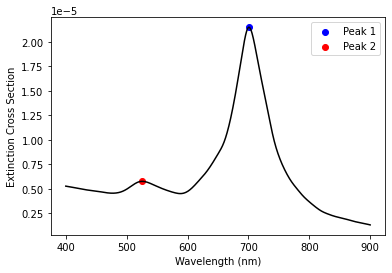

107


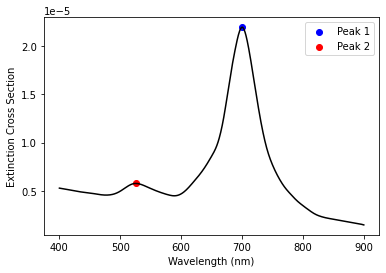

108


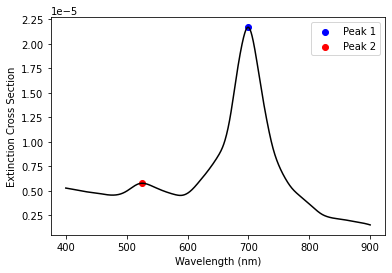

109


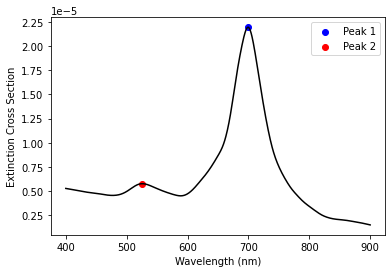

110


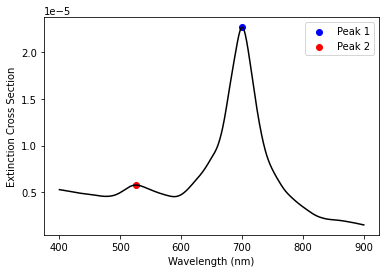

111


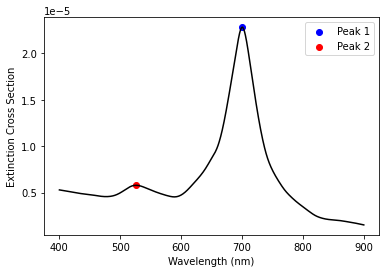

112


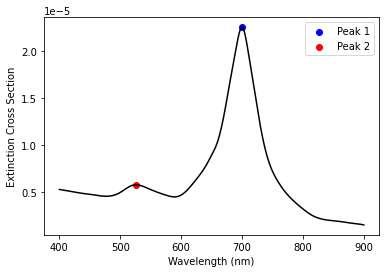

113


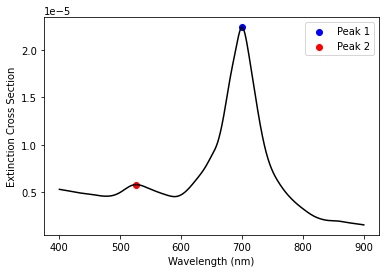

114


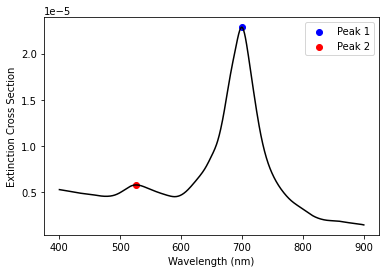

115


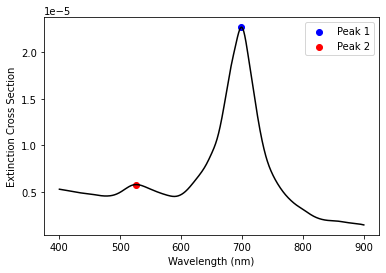

116


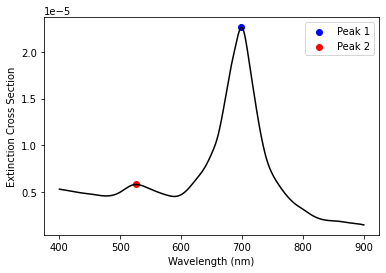

117


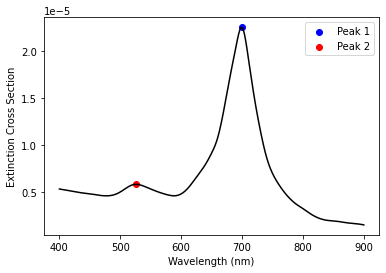

118


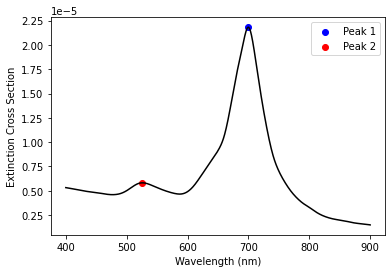

119


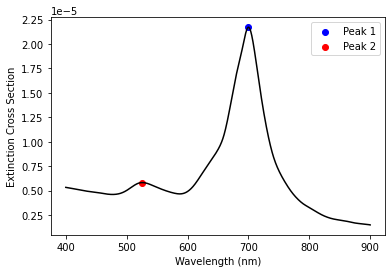

120


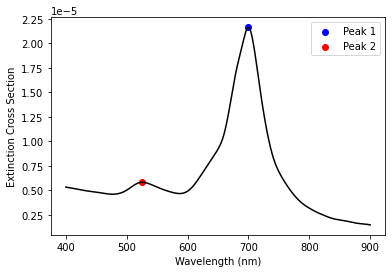

121


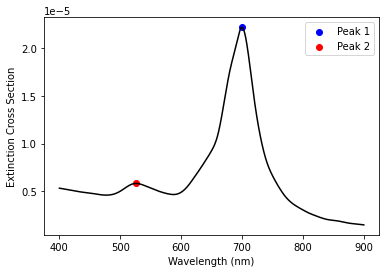

122


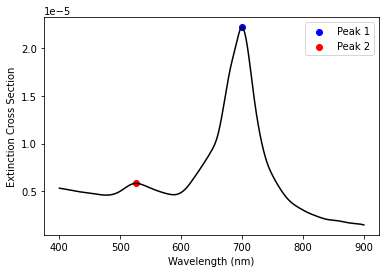

123


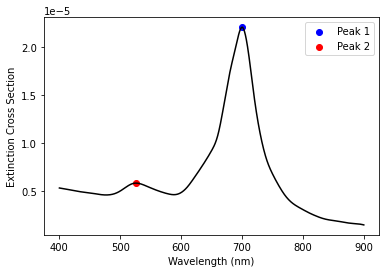

124


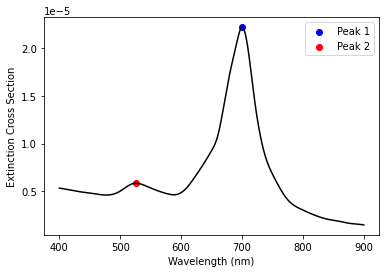

125


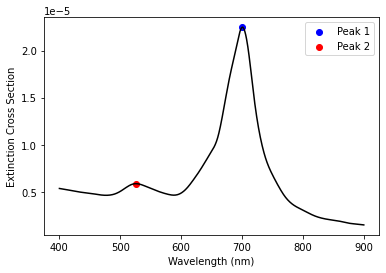

126


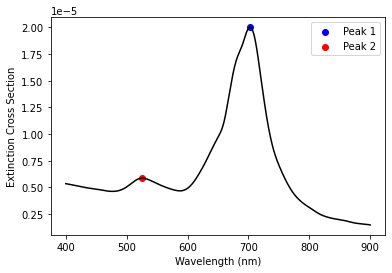

127


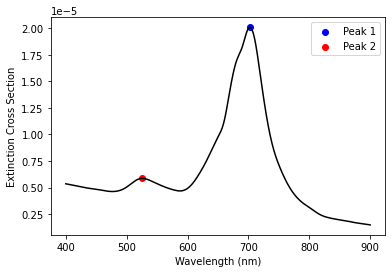

In [ ]:
wv = np.linspace(0.4,0.9,1001)
for repeat in range(10):
    print(f"Current repeat number is {repeat}")
    data = np.loadtxt(f'./data/C_cross_{repeat}.csv',delimiter=',')
    # process the data simply using scipy signal to find peak prominence
    for i in range(len(data.T)):
        print(i)
        f = scipy.interpolate.CubicSpline(wavelength,data[:,len(data.T)-i-1]) 
        
        p = plt.figure()
        plt.plot(1000*wv,f(wv),color='black')
        plt.scatter(1000*max_peak_position_total[repeat][i],
                    max_peak_cross_total[repeat][i],
                    label = 'Peak 1',
                    color = 'b')
        plt.scatter(1000*smaller_peak_position_total[repeat][i],
                    smaller_peak_cross_total[repeat][i], 
                    label = 'Peak 2', 
                    color = 'r')
        plt.xlabel('Wavelength (nm)')
        plt.ylabel('Extinction Cross Section')
        plt.legend()
        plt.show()
        p.savefig(f'./{repeat}/{i}.png',dpi=300)

In [ ]:
max_peak_position_total[repeat][i]

In [ ]:
smaller_peak_position_total[i]